# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Market Basket Analysis

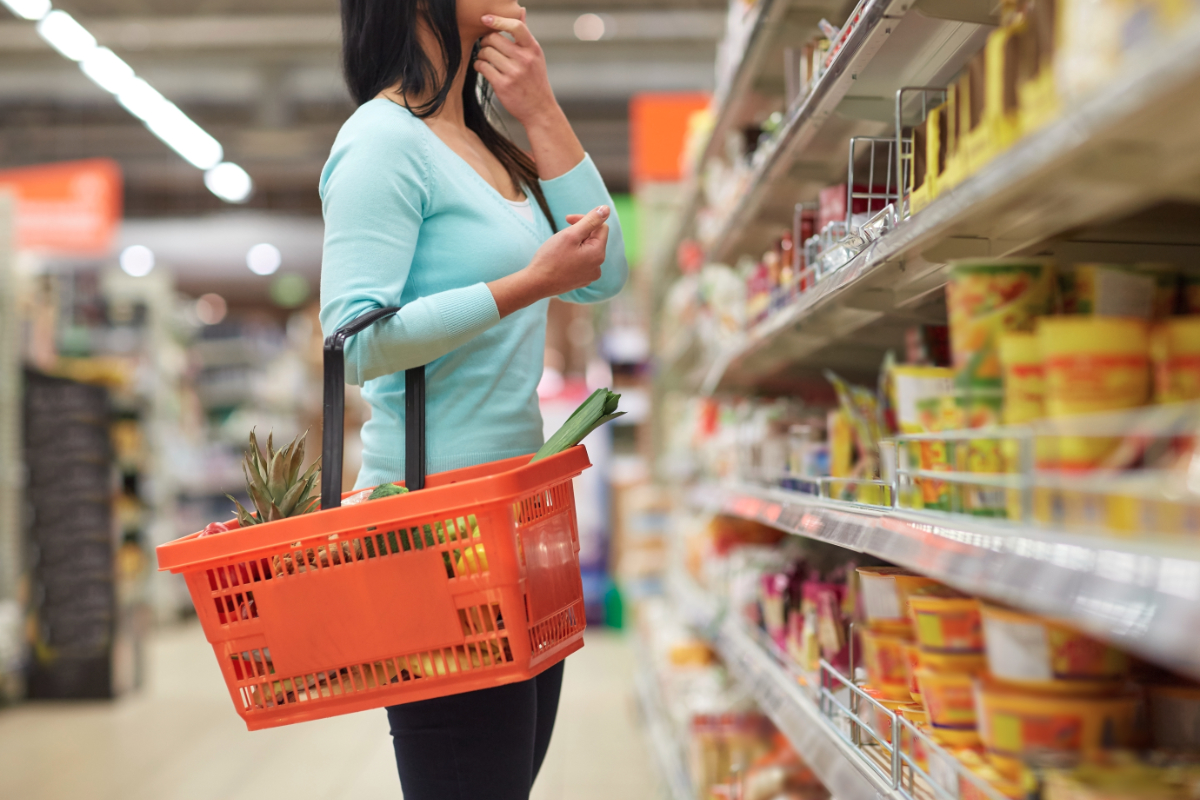

Market basket analysis is a data mining technique used to identify relationships among the products that are frequently purchased together by customers. 

These relationships are then exploited to increase sales and revenue through cross-selling, upselling, providing recommendations etc.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Understanding-Data" data-toc-modified-id="Understanding-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Understanding Data</a></span></li><li><span><a href="#Basket-Preparation" data-toc-modified-id="Basket-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basket Preparation</a></span></li><li><span><a href="#Frequent-Pattern-Analysis" data-toc-modified-id="Frequent-Pattern-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequent Pattern Analysis</a></span><ul class="toc-item"><li><span><a href="#Association-Rules" data-toc-modified-id="Association-Rules-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Association Rules</a></span><ul class="toc-item"><li><span><a href="#Problem-of-generating-association-rules" data-toc-modified-id="Problem-of-generating-association-rules-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Problem of generating association rules</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Support" data-toc-modified-id="Support-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Support</a></span></li><li><span><a href="#Confidence" data-toc-modified-id="Confidence-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>Confidence</a></span></li><li><span><a href="#Lift" data-toc-modified-id="Lift-3.1.2.3"><span class="toc-item-num">3.1.2.3&nbsp;&nbsp;</span>Lift</a></span></li><li><span><a href="#Zhang's-Metric" data-toc-modified-id="Zhang's-Metric-3.1.2.4"><span class="toc-item-num">3.1.2.4&nbsp;&nbsp;</span>Zhang's Metric</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Association-Rule-Mining" data-toc-modified-id="Association-Rule-Mining-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Association Rule Mining</a></span><ul class="toc-item"><li><span><a href="#Apriori-Algorithm" data-toc-modified-id="Apriori-Algorithm-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Apriori Algorithm</a></span><ul class="toc-item"><li><span><a href="#Enumerating-Frequent-Itemsets" data-toc-modified-id="Enumerating-Frequent-Itemsets-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Enumerating Frequent Itemsets</a></span></li><li><span><a href="#Interesting-Association-Rules" data-toc-modified-id="Interesting-Association-Rules-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Interesting Association Rules</a></span></li><li><span><a href="#Multi-Metric-Filtering" data-toc-modified-id="Multi-Metric-Filtering-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Multi Metric Filtering</a></span></li></ul></li></ul></li><li><span><a href="#Visualizing-Rules" data-toc-modified-id="Visualizing-Rules-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Rules</a></span><ul class="toc-item"><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Scatterplot</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Understanding Data

The data comes from a retail store based out of United Kingdom. They have customers who visit their store for purchase and they also provide an online shopping experience.\
After getting a glimpse of the data, we understand that customers tend to mostly make bulk purchases with the store.

We proceed to analyse the items that are frequently purchased together and to generate interesting rules.

In [88]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from itertools import permutations

import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data = pd.read_excel('Online Retail.xlsx')

In [90]:
data.shape

(541909, 8)

We see below that each row corresponds to one of the products purchased by a customer.\
Every transaction has a unique identifier which is the InvoiceNo.

In [91]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [92]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [93]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [94]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [95]:
cancelled_ids = [i for i in data.InvoiceNo.unique() if type(i) == str]
cancelled_ids[:10]

['C536379',
 'C536383',
 'C536391',
 'C536506',
 'C536543',
 'C536548',
 'C536606',
 'C536622',
 'C536625',
 'C536642']

When we go through the **InvoiceNo** we see that for certain records, it starts with letters **'A'** or **'C'**.\
Those starting with **'C'** all have a negative UnitPrice which can mean that they are products that were cancelled or returned back to the store.

Since those records do not contribute to sales, we remove them.

In [96]:
data = data[~(data['InvoiceNo'].str.contains('C|A', regex = True, na = False))]
data.shape

(532618, 8)

When we check to see if there are any missing values that might hinder us in our analysis, we find that two columns Decription and CustomerID have missing values.

**CustomerID** is not really necessary as we can use InvoiceID to identify which transaction those products belong to.

But, without the **Description**, we cannot identify what those products are. There are 1454 datapoints with no description. Since 1454 is just **0.27%** of our currently available data, we can omit those records.

In [97]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134694
Country             0
dtype: int64

In [98]:
data_feat = data[~data['Description'].isnull()]
data_feat.Description = data_feat.Description.astype(str)

C:\Users\Nicky\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Basket Preparation

In this section, we modify our data to a format that is suitable for our analysis. We call this desired format as our **basket**.

We first group the entire data based on the InvoiceNo. Then we apply a function that makes a list of all the products that belong to a particular InvoiceNo.

Thus, all items belonging to each transaction is now available to us in a nested list format.

In [99]:
transactions = pd.DataFrame(data_feat.groupby('InvoiceNo')['Description'].apply(lambda x : pd.Series(x).to_list()))['Description'].to_list()
transactions[:3]

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM ",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY ',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS ',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND']]

In [100]:
len(transactions)

20607

The **TransactionEncoder()** function from the **mlxtend** library is used to convert our transaction data into a **onehot** encoded format which is the prefered format for market basket analysis.

The **basket** is now available and will be used for further analysis.

In [125]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
basket = pd.DataFrame(onehot, columns = encoder.columns_)
basket.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Frequent Pattern Analysis

In this section, patterns that occur frequently in the data set are identified and their usefulness is measured using several metrics.

**Frequent Pattern:** A pattern (a set of items, subsequences, substructures, etc.) that occurs frequently in a data set. Mining frequent patterns serves to be an important step in various data mining tasks.

### Association Rules

Patterns (based on items) that are frequently associated together are represented by **association rules**.\
An association rule is written in the form **{A} &rarr; {B}** and is read as **"if A then B"**.
Itemset A is called as the **antecedent** and B is called the **consequent**. Association rules can also contains multiple antecedents and consequents.

#### Problem of generating association rules

The number of association rules that will be generated even for a small data set will be huge. Also, not all the rules will turn out to be useful and hence we would need to omit most of the rules. 

Several metrics are availabe, which are used to filter out only those rules that are interesting. 

#### Metrics

There are several metrics that are used to measure the level of interestingness of a generated rule. A threshold can be set on the metrics to choose rules that only satisfy the threshold. The remaining rules can be discarded.\
This process of removing rules that are not interesting is called **pruning**.

All metrics are discussed for the rule {A} &rarr; {B}.

##### Support

Support is defined as the ratio of transactions containing the items A and B to the total number of transactions. It is simply the frequency of occurence of the items A and B together.

**Support** = #Transactions&nbsp;containing&nbsp;itemsets A and B / #Total Transactions

Business decision cannot be made using support alone as {A} &rarr; {B} and {B} &rarr; {A} both gives the same result.

\begin{equation*}
\frac{\#Transactions containing itemsets A and B} {\#TotalTransactions}
\end{equation*}

##### Confidence

Confidence is the conditional probability of purchasing itemset B given that itemset A has been purchased.\
It is the ratio of the total number of transactions containing both itemsets A and B to the number of transations containing itemset A.

##### Lift

It is a metric used to measure the correlation of the itemsets.
Lift is the ratio of Support(A,B) to the Support(A)*Support(B)

**Lift < 1:** The occurrence of A is negatively correlated with the occurrence of B.\
**Lift > 1:** The occurrence of A is positively correlated with the occurrence of B.\
**Lift = 1:** A and B are independent and there is no correlation between them.

##### Zhang's Metric


Zhang's metric ranges between **-1 and 1** and gives both the level of association and dissociation between the itemsets.
A value of 1 indicates complete **association** and -1 complete **dissociation**.

These metrics will turn out to be useful in pruning the association rules that are not interesting.\
However there still exists the problem of generating association rules.

## Association Rule Mining

In this section, frequent itemsets are enumerated efficiently and interesting association rules are found using the apriori algorithm 

### Apriori Algorithm

The apriori algorithm is an efficient algorithm used to generate association rules which is based on the apriori property with states that:\
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**All nonempty subsets of a frequent itemset must also be frequent**

So if we find itemset {A} to be frequent, then itemsets {A, B}, {A, B, C} etc are all frequent.

Similarly, if we find itemset {P} to be infrequent, then itemsets {P, Q}, {P, Q, R}, {P, Q, R, S} all turn out to be infrequent and the apriori algorithm does not even enumerate it.

#### Enumerating Frequent Itemsets

The **apriori** method from **mlxtend** library is used to generate all frrequent itemsets that satisfy a minimum support value of 2%.\
The **max_len** parameter can be used to restrict the size of the itemsets generated by the algorithm.\
The maximum length of the itemset generated using apriori is found to be 2.

Although a good value of support to start with can be around 5%, the dataset in hand has a support of 0 for 65% of the products.
Thus to include more products, a minimum support value of 1% is chosen.


In [102]:
pd.Series(basket.mean(axis = 0).round(2)).value_counts(normalize=True)*100

0.00    64.289111
0.01    24.964337
0.02     6.538279
0.03     2.234903
0.04     0.974798
0.05     0.546838
0.06     0.285307
0.10     0.047551
0.08     0.047551
0.07     0.047551
0.11     0.023776
dtype: float64

In [103]:
frequent_itemsets = apriori(basket,
                            min_support = 0.01,
                            #max_len = 3,
                            low_memory=True,
                            use_colnames = True
                           )

In [124]:
frequent_itemsets.sort_values(by = 'support').round(2).head()

,support,itemsets
1739,0.01,"(LUNCH BAG BLACK SKULL., LUNCH BAG SUKI DESIG..."
1724,0.01,"(REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU..."
1206,0.01,"(JUMBO BAG STRAWBERRY, JUMBO BAG VINTAGE LEAF)"
1256,0.01,"(JUMBO STORAGE BAG SUKI, WOODEN PICTURE FRAME ..."
1688,0.01,"(LUNCH BAG SUKI DESIGN , LUNCH BAG APPLE DESIG..."


No restrictions were provided on the size of the itemset to be generated and thus the maximum size of the generated itemset is given below:

In [105]:
frequent_itemsets.itemsets.apply(lambda x : len(x)).max()

4

#### Interesting Association Rules

Association rules are generated from the frequent_itemsets obtained previously. A rule is classified as interesting if it has a minimum confidence threshold of 80%. Those rules that do not satisfy this condition are automatically pruned.

This is done using the **association_rules** method from the **mlxtend library**.

In [106]:
rules = association_rules(frequent_itemsets, 
                          metric = "confidence", 
                          min_threshold = 0.8
                         )
print(rules.shape)

# Support: 2816, 160, 14

(80, 9)


In [107]:
rules.round(2).head()
print(rules.shape)

(80, 9)


80 association rules had a threshold higher than 80% and out of those, the maximum itemset size of an antecedent is 3 and that for the consequent is 2.

In [108]:
rules.antecedents.apply(lambda x : len(x)).max()

3

In [109]:
rules.consequents.apply(lambda x : len(x)).max()

2

#### Multi Metric Filtering

The **rules** dataframe contains several association rules along with many other metrics that define them. The rules can be further filtered using combinations of the available metrics to narrow down to one or two most effective rules.

In [110]:
def get_zhang_metric(param):
    antecedent_support, consequent_support, combined_support = param

    numerator = combined_support - antecedent_support*consequent_support
    denominator = max(combined_support*(1-consequent_support), antecedent_support*(1-consequent_support))
    
    return numerator / denominator

rules['zhang'] = rules[['antecedent support', 'consequent support', 'support']].apply(get_zhang_metric, axis = 1)

For all the metrics defined so far, a high value for the metric indicates that the rule is interesting.\
Therefore we can create a combined metric which is the scaled sum of all the individual metrics. It is finally divided by 8 to give it a range from 0 to 1.

In [111]:
rules['combined_metric'] = rules[['antecedent support', 'consequent support', 'support', 'confidence', 'lift', 
                                  'leverage','conviction', 'zhang']].sum(axis = 1)
rules['normalized_metric'] = pd.DataFrame(scaler.fit_transform(rules[['antecedent support', 'consequent support', 'support', 'confidence', 
                                         'lift', 'leverage','conviction', 'zhang']])).sum(axis = 1)/8
rules = rules.round(2)
print(rules.shape)
rules

(80, 12)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.82,24.04,0.60
1,(HERB MARKER BASIL),(HERB MARKER MINT),0.01,0.01,0.01,0.86,73.80,0.01,7.03,0.86,82.59,0.40
2,(HERB MARKER MINT),(HERB MARKER BASIL),0.01,0.01,0.01,0.87,73.80,0.01,7.41,0.87,82.99,0.41
3,(HERB MARKER BASIL),(HERB MARKER PARSLEY),0.01,0.01,0.01,0.88,75.85,0.01,7.97,0.87,85.62,0.43
4,(HERB MARKER PARSLEY),(HERB MARKER BASIL),0.01,0.01,0.01,0.89,75.85,0.01,9.05,0.89,86.72,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...
75,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.02,0.05,0.01,0.91,18.46,0.01,10.49,0.90,30.86,0.49
76,"(JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...",(JUMBO BAG RED RETROSPOT),0.01,0.10,0.01,0.85,8.42,0.01,6.17,0.84,16.41,0.39
77,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SU...",(JUMBO BAG RED RETROSPOT),0.01,0.10,0.01,0.84,8.29,0.01,5.68,0.82,15.77,0.38
78,"(JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...",(JUMBO BAG RED RETROSPOT),0.01,0.10,0.01,0.87,8.54,0.01,6.77,0.85,17.18,0.44


Below are the rules with the minimum and maximum metric values

In [112]:
pd.DataFrame([rules.min(), rules.max()])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",(JUMBO BAG RED RETROSPOT),0.01,0.01,0.01,0.80,7.89,0.01,4.53,0.78,14.14,0.28
1,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",(JUMBO BAG RED RETROSPOT),0.04,0.10,0.03,0.96,80.07,0.03,23.39,0.96,96.61,0.65


In [113]:
rules.min()

antecedents           (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...
consequents                                   (JUMBO BAG RED RETROSPOT)
antecedent support                                                 0.01
consequent support                                                 0.01
support                                                            0.01
confidence                                                          0.8
lift                                                               7.89
leverage                                                           0.01
conviction                                                         4.53
zhang                                                              0.78
combined_metric                                                   14.14
normalized_metric                                                  0.28
dtype: object

In [114]:
rules.max()

antecedents           (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...
consequents                                   (JUMBO BAG RED RETROSPOT)
antecedent support                                                 0.04
consequent support                                                  0.1
support                                                            0.03
confidence                                                         0.96
lift                                                              80.07
leverage                                                           0.03
conviction                                                        23.39
zhang                                                              0.96
combined_metric                                                   96.61
normalized_metric                                                  0.65
dtype: object

We further filter rules based on the following conditions:

&nbsp;&nbsp;&nbsp;1. Support >= 0.02\
&nbsp;&nbsp;&nbsp;2. Confidence >= 0.8

In [115]:
int_rules = rules[(rules['antecedent support'] >= 0.02) & (rules['consequent support'] >= 0.02)
                 & (rules['support'] >= 0.02)]
int_rules = int_rules[int_rules['confidence'] >= 0.8]
print(int_rules.shape)
int_rules

(15, 12)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.82,24.04,0.60
20,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.02,0.02,0.02,0.84,38.77,0.02,6.01,0.83,46.53,0.40
22,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.02,0.03,0.02,0.82,31.98,0.02,5.35,0.81,39.03,0.39
27,"(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.80,15.99,0.01,4.81,0.79,22.50,0.36
31,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.86,17.14,0.01,6.79,0.85,25.75,0.43
32,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.82,16.40,0.01,5.36,0.81,23.49,0.38
33,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.80,16.04,0.02,4.87,0.79,22.61,0.36
42,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.02,0.05,0.02,0.88,17.76,0.02,7.61,0.87,27.21,0.47
43,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.03,0.05,0.03,0.86,16.55,0.02,6.60,0.85,24.99,0.58
44,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.03,0.05,0.03,0.90,18.37,0.02,9.99,0.90,30.30,0.65


In [116]:
final_rules = rules[(rules['antecedent support'] >= 0.02) &
                    (rules['consequent support'] >= 0.02) &
                    (rules['support'] >= 0.01) &
                    #(rules['confidence'] >= 0.85) &
                    #(rules['lift'] >= 20) &
                    (rules['conviction'] >= 5) &
                    (rules['zhang'] >= 0.8)
                   ]
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.82,24.04,0.60
20,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.02,0.02,0.02,0.84,38.77,0.02,6.01,0.83,46.53,0.40
22,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.02,0.03,0.02,0.82,31.98,0.02,5.35,0.81,39.03,0.39
23,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.02,0.02,0.01,0.83,33.46,0.01,5.78,0.83,40.97,0.36
31,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.86,17.14,0.01,6.79,0.85,25.75,0.43
32,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.82,16.40,0.01,5.36,0.81,23.49,0.38
42,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.02,0.05,0.02,0.88,17.76,0.02,7.61,0.87,27.21,0.47
43,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.03,0.05,0.03,0.86,16.55,0.02,6.60,0.85,24.99,0.58
44,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.03,0.05,0.03,0.90,18.37,0.02,9.99,0.90,30.30,0.65
47,"(JUMBO BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",(JUMBO BAG RED RETROSPOT),0.02,0.10,0.01,0.84,8.30,0.01,5.71,0.83,15.83,0.40


In [117]:
final_rules.shape

(13, 12)

In [118]:
final_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.82,24.04,0.60
20,(REGENCY TEA PLATE GREEN ),(REGENCY TEA PLATE ROSES ),0.02,0.02,0.02,0.84,38.77,0.02,6.01,0.83,46.53,0.40
22,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.02,0.03,0.02,0.82,31.98,0.02,5.35,0.81,39.03,0.39
23,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.02,0.02,0.01,0.83,33.46,0.01,5.78,0.83,40.97,0.36
31,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.86,17.14,0.01,6.79,0.85,25.75,0.43
32,"(CHARLOTTE BAG PINK POLKADOT, WOODLAND CHARLOT...",(RED RETROSPOT CHARLOTTE BAG),0.02,0.05,0.02,0.82,16.40,0.01,5.36,0.81,23.49,0.38
42,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.02,0.05,0.02,0.88,17.76,0.02,7.61,0.87,27.21,0.47
43,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.03,0.05,0.03,0.86,16.55,0.02,6.60,0.85,24.99,0.58
44,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.03,0.05,0.03,0.90,18.37,0.02,9.99,0.90,30.30,0.65
47,"(JUMBO BAG PINK POLKADOT, JUMBO BAG SCANDINAVI...",(JUMBO BAG RED RETROSPOT),0.02,0.10,0.01,0.84,8.30,0.01,5.71,0.83,15.83,0.40


## Visualizing Rules

### Heatmap

The heatmap shows the relationship between the antecedents and the consequents of all rules.\
The metric of association used is 'confidence'.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


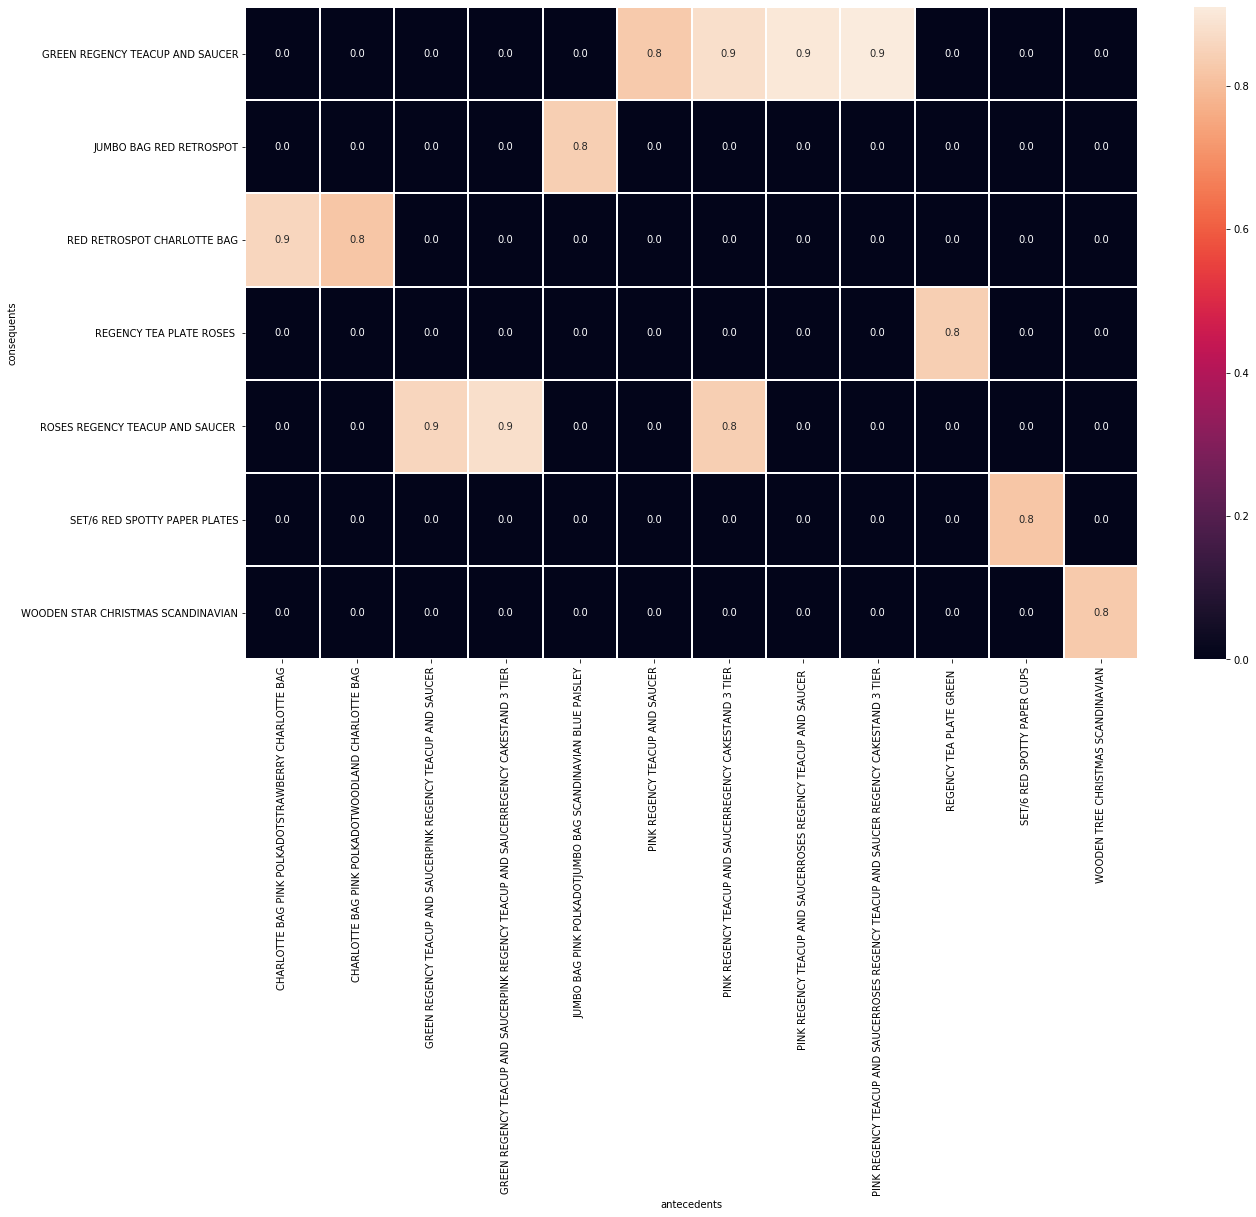

In [119]:
final_rules['antecedents'] = final_rules['antecedents'].apply(lambda a : ''.join(list(a)))
final_rules['consequents'] = final_rules['consequents'].apply(lambda c : ''.join(list(c)))

pivot = final_rules.pivot_table(index='consequents', columns='antecedents', values='confidence').fillna(0)

plt.figure(figsize=(20,12))
sns.heatmap(pivot, annot = True, fmt=".1f", linewidths=1)
plt.xticks(rotation = 90)
plt.show()

### Scatterplot

In [120]:
scatter_rules = association_rules(frequent_itemsets, 
                                  metric = "support", 
                                  min_threshold = 0
                                 )
print(scatter_rules.shape)

(2816, 9)


The below scatterplot is plotted between the support and confidence of the rules.\
The color and size of the point or bubble is based on the value of the lift metric.

It is a general pattern that rules with high lift values appear on the top left corner.

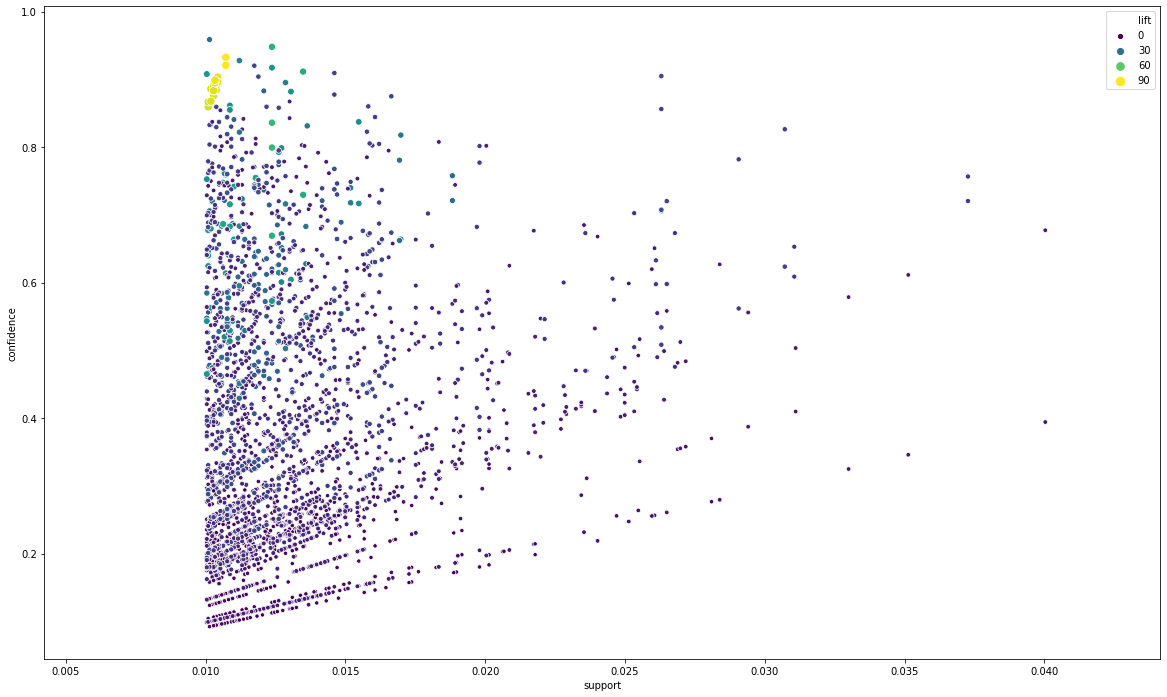

In [121]:
plt.figure(figsize=(20,12))
sns.scatterplot(x = "support", y = "confidence", size = "lift", hue = "lift", data = scatter_rules, palette="viridis")
plt.show()

## Conclusion

Finally, based on the business problem, we can choose an appropriate metric and filter the rules that satisfy a threshold of that metric.

As customers of this store always purchase in bulk, we observe that the confidence is generally high for all rules. Thus we go for support to see how many different customers purchase the same product.

Thus we filter all rules with a **support > 0.02**

In [122]:
final_rules[final_rules['support'] > 0.02]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang,combined_metric,normalized_metric
0,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.04,0.05,0.03,0.83,16.78,0.03,5.48,0.82,24.04,0.60
43,GREEN REGENCY TEACUP AND SAUCERPINK REGENCY TE...,ROSES REGENCY TEACUP AND SAUCER,0.03,0.05,0.03,0.86,16.55,0.02,6.60,0.85,24.99,0.58
44,PINK REGENCY TEACUP AND SAUCERROSES REGENCY TE...,GREEN REGENCY TEACUP AND SAUCER,0.03,0.05,0.03,0.90,18.37,0.02,9.99,0.90,30.30,0.65


In [123]:
final_rules[final_rules['support'] > 0.02][['antecedents', 'consequents']]

,antecedents,consequents
0,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER
43,GREEN REGENCY TEACUP AND SAUCERPINK REGENCY TE...,ROSES REGENCY TEACUP AND SAUCER
44,PINK REGENCY TEACUP AND SAUCERROSES REGENCY TE...,GREEN REGENCY TEACUP AND SAUCER


We see that customers tend to purchase different colors of the teacup and saucer together. 

So, we can form a bundle of many colors of the same product and sell them at a reduced price to ensure that the customer **ends up buying all the colors rather than only buying one or two colors.**